In [6]:
import sys
# sys.path.insert(0, '..')

%matplotlib inline
import d2l
import mxnet as mx
from mxnet import autograd, gluon, image, init, nd
from mxnet.gluon import data as gdata, loss as gloss, utils as gutils
import sys
import time

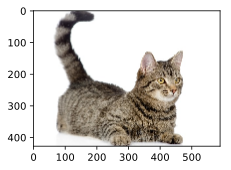

In [11]:
d2l.set_figsize()
img = image.imread('../image/cat.jpg')
d2l.plt.imshow(img.asnumpy())

In [12]:
# This function is saved in the d2l package for future use
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [13]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

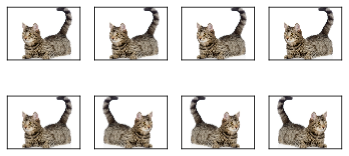

In [14]:
apply(img, gdata.vision.transforms.RandomFlipLeftRight())


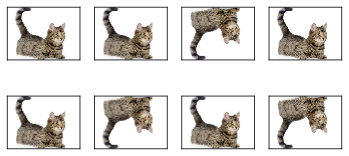

In [15]:
apply(img, gdata.vision.transforms.RandomFlipTopBottom())


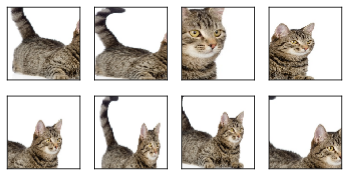

In [21]:
shape_aug = gdata.vision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)


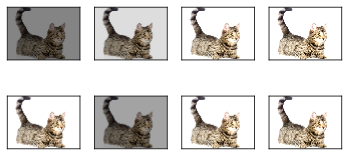

In [22]:
apply(img, gdata.vision.transforms.RandomBrightness(0.5))


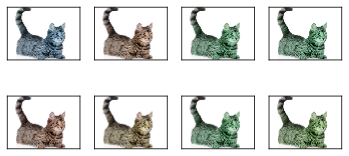

In [23]:
apply(img, gdata.vision.transforms.RandomHue(0.5))


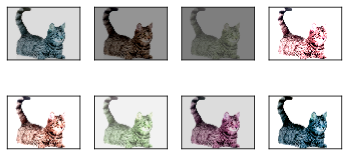

In [24]:
color_aug = gdata.vision.transforms.RandomColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)


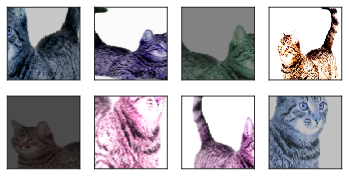

In [25]:
augs = gdata.vision.transforms.Compose([
    gdata.vision.transforms.RandomFlipLeftRight(), color_aug, shape_aug])
apply(img, augs)

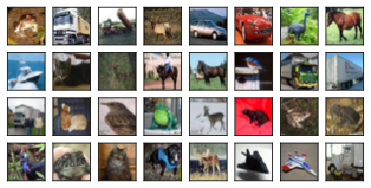

In [26]:
show_images(gdata.vision.CIFAR10(train=True)[0:32][0], 4, 8, scale=0.8);


In [27]:
train_augs = gdata.vision.transforms.Compose([
    gdata.vision.transforms.RandomFlipLeftRight(),
    gdata.vision.transforms.ToTensor()])

test_augs = gdata.vision.transforms.Compose([
    gdata.vision.transforms.ToTensor()])

In [33]:
num_workers = 0 if sys.platform.startswith('win32') else 4
def load_cifar10(is_train, augs, batch_size):
    return gdata.DataLoader(
        gdata.vision.CIFAR10(train=is_train).transform_first(augs),
        batch_size=batch_size, shuffle=is_train, num_workers=num_workers)

In [34]:
x = nd.random.uniform(shape=(4, 1, 28, 28))


In [35]:
x


[[[[0.5488135  0.5928446  0.71518934 ... 0.3927848  0.92559665
    0.83607876]
   [0.07103606 0.33739617 0.08712929 ... 0.53737324 0.9446689
    0.7586156 ]
   [0.5218483  0.1059076  0.41466194 ... 0.93553907 0.53881675
    0.8463109 ]
   ...
   [0.8052232  0.01178803 0.52164716 ... 0.7137619  0.10873607
    0.51789856]
   [0.89390415 0.7853887  0.85715425 ... 0.86400425 0.08395315
    0.15514489]
   [0.71272594 0.77483064 0.5995434  ... 0.29543683 0.03342143
    0.08252441]]]


 [[[0.95694935 0.7259542  0.13720933 ... 0.56314117 0.0208098
    0.80126536]
   [0.13521017 0.94317764 0.11627302 ... 0.89298266 0.9657492
    0.17915347]
   [0.9726011  0.758584   0.45344925 ... 0.53057545 0.3475812
    0.9932467 ]
   ...
   [0.1671392  0.09982012 0.39244246 ... 0.39494097 0.28793445
    0.47957394]
   [0.8224663  0.39094034 0.62618303 ... 0.2944338  0.69951206
    0.05285462]
   [0.9998673  0.31748822 0.22006729 ... 0.7388402  0.24729377
    0.27477896]]]


 [[[0.6718066  0.48458487 0.56172